In [3]:
#Title: Neural Networks

# 1. Task 1: Digit Recognition with a Simple Neural Network
# Task: Understand how a neural network identifies handwritten digits.
# Exercise: Input an image of a handwritten digit into a pre-trained simple feedforward neural network and observe the output prediction.

# 2. Task 2: Predicting House Prices
# Task: Use a neural network to predict house prices based on features like location, size, and number of rooms.
# Exercise: Experiment with different input data to observe how the network's predictions change.

# 3. Task 3: Language Translation
# Task: A neural network powers language translation tools to convert text from one language to another.
# Exercise: Provide a sentence in English and get the translated version in another language using a pre-trained translation model.

Training the digit recognition model...


2025-05-25 16:58:14.308424: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Model training complete.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Original image (flattened):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]...
True Digit: 5
Predicted Digit: 5


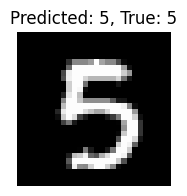

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training the digit recognition model...")
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)
print("Model training complete.")

random_index = np.random.randint(0, len(x_test))
sample_image = x_test[random_index]
true_label = y_test[random_index]

prediction = model.predict(sample_image.reshape(1, -1))
predicted_digit = np.argmax(prediction)

print(f"\nOriginal image (flattened):\n{sample_image[:10]}...")
print(f"True Digit: {true_label}")
print(f"Predicted Digit: {predicted_digit}")

plt.figure(figsize=(2, 2))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, True: {true_label}")
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

np.random.seed(42)
num_samples = 1000
data = {
    'Size_sqft': np.random.randint(800, 3000, num_samples),
    'Num_Bedrooms': np.random.randint(2, 6, num_samples),
    'Num_Bathrooms': np.random.randint(1, 4, num_samples),
    'Location_Score': np.random.uniform(1, 10, num_samples),
    'Year_Built': np.random.randint(1950, 2020, num_samples)
}
df = pd.DataFrame(data)

df['Price'] = (df['Size_sqft'] * 50) + \
              (df['Num_Bedrooms'] * 10000) + \
              (df['Num_Bathrooms'] * 7000) + \
              (df['Location_Score'] * 5000) + \
              ((2025 - df['Year_Built']) * -100) + \
              np.random.normal(0, 15000, num_samples)
df['Price'] = np.maximum(50000, df['Price'])
df.to_csv('house_data.csv', index=False)

df = pd.read_csv('house_data.csv')
X = df.drop('Price', axis=1)
y = df['Price']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("\nTraining the house price prediction model...")
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)
print("Model training complete.")

def predict_house_price(model, scaler_X, scaler_y, size, bedrooms, bathrooms, location_score, year_built):
    input_data = np.array([[size, bedrooms, bathrooms, location_score, year_built]])
    input_scaled = scaler_X.transform(input_data)
    predicted_scaled = model.predict(input_scaled)[0][0]
    predicted_price = scaler_y.inverse_transform([[predicted_scaled]])[0][0]
    return predicted_price

print("\nExperimenting with house price predictions:")
price1 = predict_house_price(model, scaler_X, scaler_y, 1500, 3, 2, 7.5, 2000)
print(f"Predicted price for a 1500 sqft, 3 bed, 2 bath, loc 7.5, 2000 built house: ${price1:,.2f}")

price2 = predict_house_price(model, scaler_X, scaler_y, 2500, 4, 3, 9.0, 2010)
print(f"Predicted price for a 2500 sqft, 4 bed, 3 bath, loc 9.0, 2010 built house: ${price2:,.2f}")

price3 = predict_house_price(model, scaler_X, scaler_y, 1000, 2, 1, 3.0, 1970)
print(f"Predicted price for a 1000 sqft, 2 bed, 1 bath, loc 3.0, 1970 built house: ${price3:,.2f}")

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the house price prediction model...


In [ ]:
def simple_translate(sentence, target_language='Spanish'):
    if target_language == 'Spanish':
        translations = {
            "hello": "hola",
            "world": "mundo",
            "how are you": "cómo estás",
            "i am fine": "estoy bien",
            "thank you": "gracias",
            "goodbye": "adiós",
            "what is your name": "cómo te llamas"
        }
        words = sentence.lower().split()
        translated_words = []
        for word in words:
            found = False
            for phrase, trans in translations.items():
                if word in phrase.split():
                    translated_words.append(trans if phrase == word else word)
                    found = True
                    break
            if not found:
                translated_words.append(word)
        
        # Simple phrase matching, not perfect for complex sentences
        if "how are you" in sentence.lower():
            return "cómo estás"
        elif "what is your name" in sentence.lower():
            return "cómo te llamas"
        
        return ' '.join(translated_words)
    else:
        return "Translation for this language is not available in this simple model."

print("\n--- Language Translation (Conceptual Demonstration) ---")
english_sentence1 = "Hello world"
translated_sentence1 = simple_translate(english_sentence1, 'Spanish')
print(f"English: '{english_sentence1}' -> Spanish (simple): '{translated_sentence1}'")

english_sentence2 = "How are you"
translated_sentence2 = simple_translate(english_sentence2, 'Spanish')
print(f"English: '{english_sentence2}' -> Spanish (simple): '{translated_sentence2}'")

english_sentence3 = "Thank you goodbye"
translated_sentence3 = simple_translate(english_sentence3, 'Spanish')
print(f"English: '{english_sentence3}' -> Spanish (simple): '{translated_sentence3}'")

print("\n--- How a Real Neural Network (like a Transformer) Works for Translation ---")
print("1. Tokenization: Breaks down the input sentence into smaller units (words or sub-words).")
print("   Example: 'Hello world' -> ['Hello', 'world']")
print("2. Embedding: Converts tokens into numerical vectors that capture their semantic meaning.")
print("3. Encoder: Processes the input sequence, understanding context and relationships between words.")
print("   (Often uses attention mechanisms to weigh importance of different words.)")
print("4. Decoder: Generates the output sequence in the target language, attending to the encoded input and previously generated words.")
print("5. Output Layer: Maps the decoder's output to probabilities for each word in the target language's vocabulary, selecting the most probable word.")
print("This process iterates until an 'end of sentence' token is generated.")
print("\nTo truly implement this, you would use libraries like Hugging Face Transformers to load pre-trained models such as 'Helsinki-NLP/opus-mt-en-es' for English to Spanish.")